In [1]:
# Mandatory cell for the rest of this assignment

%load_ext autoreload
%autoreload 2

from sys import path

path.append('../scripts')

In [2]:
# Création du dictionnaire d'NFT
dico_nft = {}

for i in range(0, 100):
    nftId = f"NFT{i}"
    dico_nft[nftId] = f"../nft_images/{nftId}.png"

In [3]:
# Import des modules nécessaires
from node import BlockchainNode
from network import Node
from wallet import Wallet
from proof_of_stake import ProofOfStake
from smart_contract import SmartContractDefinition, SmartContractWritingOperation

# Création de plusieurs wallets pour les nœuds de la blockchain
walletNode1 = Wallet()
walletNode2 = Wallet()
walletNode3 = Wallet()

# Création d'un wallet propriétaire pour le smart contract
walletProprietaire = Wallet()

# Création de wallets user :
walletMatthieu = Wallet()
walletEdouard = Wallet()
walletMilo = Wallet()
walletHugo = Wallet()
walletVincent = Wallet()
walletHenri = Wallet()

# Initialisation du mécanisme de Proof of Stake avec le premier nœud
pos = ProofOfStake(walletNode1.publicKey)

# On reset le network
Node.reset_network()

# On connecte les 3 noeuds au network
node1 = BlockchainNode(walletNode1,pos)
node2 = BlockchainNode(walletNode2,pos)
node3 = BlockchainNode(walletNode3,pos)

assert len(Node.get_all_nodes()) == 3
"Success"

'Success'

In [4]:
# Exemple de source de code pour le smart contract
source_code = """
class MyNFTContract:
    def __init__(self, issuerPublicKey):
        self.issuerPublicKey = issuerPublicKey
        self.nfts = {}  # Dictionnaire des NFTs

    def mint(self, ownerPublicKey, nftId):
        if nftId not in self.nfts:
            self.nfts[nftId] = ownerPublicKey
            print(f"NFT {nftId} frappé par {ownerPublicKey}")
        else:
            raise ValueError(f"NFT {nftId} déjà existant")

    def transfer(self, senderPublicKey, receiverPublicKey, nftId):
        if nftId in self.nfts and self.nfts[nftId] == senderPublicKey:
            self.nfts[nftId] = receiverPublicKey
            print(f"NFT {nftId} transféré de {senderPublicKey} à {receiverPublicKey}")
        else:
            raise ValueError("NFT inexistant ou propriété invalide")
"""

# Création du Smart Contract (définition)
NFT_contract = SmartContractDefinition(issuerPublicKey=walletProprietaire.publicKey, sourceCode=source_code, Ntoken=5)

# Signer le certificat
walletProprietaire.sign(NFT_contract)

# Instanciation du Smart Contract
NFT_instance = NFT_contract.instantiate_contract()

# Ajouter le Smart Contract au premier nœud (node1)
node1.new_certificate(NFT_contract) # Ajouter le smart contract au nœud

print(node1.blockchain.blockList)
print(node2.blockchain.blockList)
print(node3.blockchain.blockList)

Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000001879CF946E0>
Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000001879CF946E0>
Échec du forger du bloc. Diffusion du certificat : <smart_contract.SmartContractDefinition object at 0x000001879CF946E0>


In [5]:
# On vérifie si la période de minage est ouverte
NFT_contract.is_minting_open()

False

La période de minage est fermée donc les utilisateurs ne peuvent pas encore miner leur NFT. On peut quand même faire les tests :

In [15]:
try:
    assert NFT_contract.mint(ownerPublicKey=walletEdouard.publicKey, nftId="NFT1")
except ValueError as error:
    print(error)

La période de minage est fermée.


Il n'y a que le propriétaire du smart contract qui peut activer la période de minage. Ici c'est Alice !

In [17]:
NFT_contract.open_minting(walletProprietaire.publicKey, 1000)

Période de minage ouverte pendant 1000 secondes


In [18]:
assert NFT_contract.is_minting_open()
"Minting open!"

'Minting open!'

Maintenant qu'on a ouvert la periode de minage les utilisateurs peuvent miner des NFT

In [19]:
NFT_contract.mint(ownerPublicKey=walletEdouard.publicKey, nftId="NFT1")
print(NFT_contract.owners)

NFT NFT1 minée par 30820122300d06092a864886f70d01010105000382010f003082010a028201010092ab758566549c3280f41f2565f7567a3620372e296cf9cded912cb08764f2304810768da8242b1a806785ea67f734291bd42473588c325670677bded9dd47408b19f379486d373f69aa0547a25a698284761c04b2d064d8580647a258cdf38332851b0f7096d12535e2fe865eb5d6a4bd09a01b808a52aa2644d3c4360b266935f83ca03f273b880d48b9b230c2084d002378ca96f92a4d8f0d084c8f14489c4fc01315eca8d76bffc00873eaa0d02bb3f4b377aa9c2939e5ec298321aa8daa562aab86575012481c2d3592d399444439abda53aca3fc3fa48d8560d925b7d83ce6a51ca14995a6d2ee3cae5085856a2c558425e0d3caaa2226636d1c15c1290203010001
{'NFT1': '30820122300d06092a864886f70d01010105000382010f003082010a028201010092ab758566549c3280f41f2565f7567a3620372e296cf9cded912cb08764f2304810768da8242b1a806785ea67f734291bd42473588c325670677bded9dd47408b19f379486d373f69aa0547a25a698284761c04b2d064d8580647a258cdf38332851b0f7096d12535e2fe865eb5d6a4bd09a01b808a52aa2644d3c4360b266935f83ca03f273b880d48b9b230c2084d002378ca96f92a4d8f0d084c8f14

In [20]:
NFT_contract.mint(ownerPublicKey=walletMatthieu.publicKey, nftId="NFT2")
NFT_contract.mint(ownerPublicKey=walletHugo.publicKey, nftId="NFT3")
NFT_contract.mint(ownerPublicKey=walletMilo.publicKey, nftId="NFT4")
NFT_contract.mint(ownerPublicKey=walletHenri.publicKey, nftId="NFT5")

NFT NFT2 minée par 30820122300d06092a864886f70d01010105000382010f003082010a0282010100c525652a5b7de8d315f43319cefeb70648583ba0cbc3d5aea6a6d8555c0cde976eade28894603a0ac44be7cf9dce88f2dec2fd8d4a64609b7792c184f3a687db128d4c30563c431d672c9efefe7e10f8a13e5c6f853b84e498ab8357eb3845380b2c21e74def26aa48fcc81ad32b409c1ed9eb7819e254948b83fa88bdd927d05d75f7a6203d00ebb751d5da9394c25dc643a521db4ab3d93353af002c3771a35544246a0bc78aea1bd2d6c3f31aa80fcca037b189cfecba5fb53a7c9d8f42a67c7d077f93403fd3d7c551c7ea3946feafaf63f41e5f5697086dd9ee18eb75573238a2c3f974550566f56ce94855490f0dc93dd67e4c45de74c17e0d7b436a950203010001
NFT NFT3 minée par 30820122300d06092a864886f70d01010105000382010f003082010a0282010100b66df5441f21a2aeba42661243432945f88ab32f576dbfb29a07ab3bcddf7194f76f02cef82a3b735855c6839e7a2fad582c88bbb42fc56d85cdb9ee25a3531bc5485344fb5d0d43c48537cb6840c66e76e34eebbebc868bba51c12c1b1ed9e6c5c3406881cb4500a624c0aa7749265c50977a09c6af9ee58f513f922912a0f030ee58350d8bfa28a86da37de9849dff02584fedbd48ada4967

In [22]:
NFT_contract.mint(ownerPublicKey=walletVincent.publicKey, nftId="NFT6")

ValueError: Nombre de token maximal atteint

Ici on a atteind le nombre maximal de token donc on ne peut plus acheter de NFT

On peut changer le propriétaire d'un NFT si c'est le propriétaire de ce dernier qui le demande

In [23]:
NFT_contract.transfer(senderPublicKey=walletHenri.publicKey, receiverPublicKey=walletVincent.publicKey, nftId="NFT5")

NFT NFT5 transférée de 30820122300d06092a864886f70d01010105000382010f003082010a0282010100dc65d0cf29ec40ff14608b955bf0dd8ba2b0b62e6b517b5faabb93d7b675d95925d4c35bb10199cea3e402511247c4db62b46b5aee7895f571b58d72576de1bf6df185fdda34b80e5abd2e7d6a4907bd67dda70b4dc5b962bfddf87dae4a512a78b8723b80fa6d0b0dfd0c80c4584904d7f820f111ec38cbfce1f7c6eba65d1bf572afdd6e7f1205574fab5e1b8c6141333b33ef0a2a4824888ebdd3b63c5377c3dc729e1baf28e8911fdf262b6e1f223eb30b704c468fa8afa09ddced483f358f01f94f703a673de3683e93b4b639597fd103ab33305f229ca8bd704ee3c06bd13b8ef6933d356beafc4dca0271394d46f52f6e76d4b277765d20f336ff0a890203010001 à 30820122300d06092a864886f70d01010105000382010f003082010a028201010092e398b86dcf3bfafbf2acd97e9e78020287d8a23f14ef1fff9304d1554f586570e72e0ee62180eb1f00d85528ecad0e21421e93cb942e68e26c0ad0eccc908eb6d9180b5a571477787827427abdac3052e891a30c59c8837e653af060d90e983a1a2380502f201d4970cfb8e8d32bfe82c0ce950823e2870f899b0de8c824d8a9bfabd785781b8a4d9235815f862d01c211dc7c7d7237fe72d1bb1dae745add

In [24]:
NFT_contract.transfer(senderPublicKey=walletHenri.publicKey, receiverPublicKey=walletVincent.publicKey, nftId="NFT5")

ValueError: NFT n'appartient pas à l'expéditeur

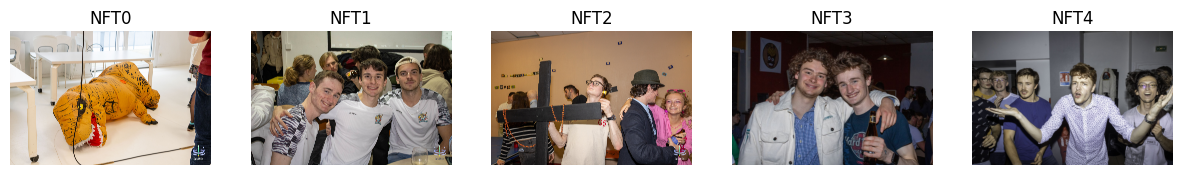

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

# Affichage des 5 premières images avec leur ID
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for idx, (nftId, imagePath) in enumerate(dico_nft.items()):
    if idx >= 5:
        break
    try:
        image = Image.open(imagePath)
        axes[idx].imshow(image)
        axes[idx].set_title(nftId)
        axes[idx].axis('off')
    except FileNotFoundError:
        print(f"Image non trouvée : {imagePath}")
        axes[idx].set_title(f"{nftId}\n[Manquante]")
        axes[idx].axis('off')

plt.show()